In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings('error', category=DeprecationWarning)
import pandas as pd
import numpy as np
from numpy import int64
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2
from stable_baselines3 import PPO                                                    
import gym   
import gym_md
import matplotlib.gridspec as gridspec
# %pip install seaborn

2023-08-18 10:23:39.208974: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [83]:
def get_exp_details(name):
    config = {}
    var = name.split('_')
    # print(var)
    if len(var[1])==1 and var[2]=='not':
        # print("len(var[1])==1 and var[2]!='not'")
        # check_1_not_original_clearer_risky_baseline
        # check_1_original_optimal_baseline
        config['lvl'] = f"{var[0]}_{var[1]}"
        config['reward_scheme'] = f"{var[2]}_{var[3]}"
        config['play_style'] = f"{var[4]}_{var[5]}"
        config['exp_type'] = var[6]
    # elif len(var[1])==1 and 'not' in var and 'optimal' in var: 
    #     # check_1_not_original_clearer_risky_baseline
    #     # print("len(var[1])==1 and 'not' in var and 'optimal' in var")
    #     config['lvl'] = f"{var[0]}_{var[1]}"
    #     config['reward_scheme'] = f"{var[2]}_{var[3]}"
    #     config['play_style'] = f"{var[4]}_{var[5]}"
    #     config['exp_type'] = var[6]
    elif len(var[1])==1 and var[2]!='not':
        # print("len(var[1])==1 and 'not' not in var and 'optimal' not in var")
        # check_1_not_original_clearer_risky_baseline
        # check_1_original_optimal_baseline
        config['lvl'] = f"{var[0]}_{var[1]}"
        config['reward_scheme'] = var[2]
        config['play_style'] = var[3]
        config['exp_type'] = var[4]
    elif len(var[1])!=1 and var[2]=='not':
        # hard_not_original_clearer
        config['lvl'] = var[0]
        config['reward_scheme'] = f"{var[1]}_{var[2]}"
        config['play_style'] = f"{var[3]}_{var[4]}"
        config['exp_type'] = var[5]
    else:
        print("else")
        # hard_not_original_clearer_safe_baseline
        config['lvl'] = var[0]
        config['reward_scheme'] = var[1]
        config['play_style'] = var[2]
        config['exp_type'] = var[3]

    # print(config)
    return config


def get_reshape(row):
    # print(row)
    return np.fromstring(row['grid'].replace('\n','')
                .replace('[','')
                .replace(']','')
                .replace('  ',' '), sep=' ').reshape(row['grid_rows'],row['grid_columns'])

def gen_heatmap(df,f):
    df = df.reset_index()
    x_array = df['x'].to_numpy()
    y_array =df['y'].to_numpy()
    grid = np.zeros((df['grid_rows'][0],df['grid_columns'][0]))
    for i, j in zip(y_array,x_array):
        grid[i,j]+=1
    heat =sns.heatmap(grid,cmap='viridis',alpha =0.6,zorder=2)
    my_image = cv2.imread(f)
    my_image = cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
    # plt.imshow(my_image)
    plt.title(df['experiment'][0])
    img = heat.imshow(my_image,aspect=heat.get_aspect(),extent= heat.get_xlim() + heat.get_ylim(),zorder=1)
    return img

def gen_data(lvl,reward_scheme, play_style,exp_type,path):   
    data =[]
    exp_type =exp_type
    lvl =lvl
    play_style= play_style
    reward_scheme=reward_scheme
    env = gym.make(f"md-{lvl}-v0")                                                           
                                                                
    # model = PPO(policy = "MlpPolicy",env =  env, verbose=1,device="cuda") 
    print(exp_type)
    exp = f"{lvl}_{reward_scheme}_{play_style}_{exp_type}"
    exp= exp
    print(exp)
    model = PPO.load(f"logs/{path}/{exp}/best_model/best_model")  # loading the model from ppo_cartpole.zip             
                                                                                            
    obs = env.reset()  
    for ep in range(5):                                                                    
        for i in range(1000):                                                                   
            action, _state = model.predict(obs, deterministic=False)                             
            obs, reward, done, info = env.step(action) 
            grid= np.array(env.grid.g)  
            data.append([exp, lvl, i, env.agent.x, env.agent.y, grid, play_style, info['action_taken'], obs, done, reward, dict(info),grid.shape[0],grid.shape[1]])
                                                
            # env.render(mode='human')                                                                        
            if done:                                                                            
                obs = env.reset()
                break
                
    return data

def gen_data_and_img(lvl,reward_scheme, play_style,exp_type,path, img_path):
    data =gen_data(lvl,reward_scheme, play_style,exp_type,path)
    df = pd.DataFrame(data, columns=['experiment','level','run','x','y','grid','play_style','action','observation','done','reward','info','grid_rows','grid_columns'])

    img =gen_heatmap(df, img_path)
    return img



In [3]:
data =gen_data("hard", "original", "optimal", "test", "batch")
df = pd.DataFrame(data, columns=['experiment','level','run','x','y','grid','play_style','action','observation','done','reward','info','grid_rows','grid_columns'])
# df['grid'] = df[['grid','grid_rows','grid_columns']].apply(lambda x: get_reshape(x),axis=1)
# df.dtypes
df

test
hard_original_optimal_test


/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


,experiment,level,run,x,y,grid,play_style,action,observation,done,reward,info,grid_rows,grid_columns
0,hard_original_optimal_test,hard,0,5,11,"[[2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 5], [3, 1, ...",optimal,POTION,"[1, 7, 7, 7, 16, 19, 1000, 30]",False,-1.0,"{'action_taken': 'POTION', 'POTION': 1, '.': 1}",12,12
1,hard_original_optimal_test,hard,1,4,11,"[[2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 5], [3, 1, ...",optimal,TREASURE,"[2, 6, 6, 8, 15, 20, 1000, 30]",False,-1.0,"{'action_taken': 'TREASURE', 'POTION': 1, '.':...",12,12
2,hard_original_optimal_test,hard,2,5,11,"[[2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 5], [3, 1, ...",optimal,MONSTER,"[1, 7, 7, 7, 16, 19, 1000, 30]",False,-1.0,"{'action_taken': 'MONSTER', 'POTION': 1, '.': ...",12,12
3,hard_original_optimal_test,hard,3,4,11,"[[2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 5], [3, 1, ...",optimal,TREASURE,"[2, 6, 6, 8, 15, 20, 1000, 30]",False,-1.0,"{'action_taken': 'TREASURE', 'POTION': 1, '.':...",12,12
4,hard_original_optimal_test,hard,4,3,11,"[[2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 5], [3, 1, ...",optimal,TREASURE,"[2, 5, 5, 7, 14, 21, 1000, 30]",False,-1.0,"{'action_taken': 'TREASURE', 'POTION': 1, '.':...",12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,hard_original_optimal_test,hard,53,0,7,"[[2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 5], [3, 1, ...",optimal,MONSTER,"[4, 2, 2, 6, 7, 20, 1000, 10]",False,-1.0,"{'action_taken': 'MONSTER', 'TREASURE': 17, '....",12,12
399,hard_original_optimal_test,hard,54,0,6,"[[2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 5], [3, 1, ...",optimal,EXIT,"[3, 1, 1, 5, 6, 19, 1000, 10]",False,-1.0,"{'action_taken': 'EXIT', 'TREASURE': 17, '.': ...",12,12
400,hard_original_optimal_test,hard,55,0,5,"[[2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 5], [3, 1, ...",optimal,MONSTER,"[2, 0, 0, 4, 5, 18, 1000, 10]",False,2.0,"{'action_taken': 'MONSTER', 'TREASURE': 17, '....",12,12
401,hard_original_optimal_test,hard,56,0,4,"[[2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 5], [3, 1, ...",optimal,TREASURE,"[1, 4, 21, 3, 4, 17, 1000, 10]",False,-1.0,"{'action_taken': 'TREASURE', 'TREASURE': 18, '...",12,12


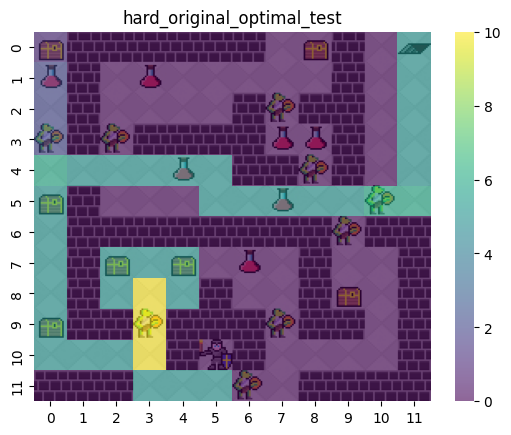

In [5]:
img =gen_heatmap(df=df.loc[df['experiment'] == 'hard_original_optimal_test'], f ='./README/resources/md_stages_screenshots/md-hard-v0_step0.jpg')

# fig, ax = plt.subplots(1,2)
# img =gen_heatmap(df=df.loc[df['experiment'] == 'hard_original_optimal_test'], f ='./README/resources/md_stages_screenshots/md-hard-v0_step0.jpg')
# README/resources/md_stages_screenshots/md-hard-v0_step0.jpg
# img
plt.show()

In [4]:
dirs =os.listdir('./logs/Baseline/')
models = []
for i in dirs:
    models.append(str(i))
models = sorted(models)
print(models)


['check_1_not_original_clearer_risky_baseline', 'check_1_not_original_clearer_safe_baseline', 'check_1_not_original_killer_risky_baseline', 'check_1_not_original_killer_safe_baseline', 'check_1_not_original_runner_risky_baseline', 'check_1_not_original_runner_safe_baseline', 'check_1_not_original_treasure_risky_baseline', 'check_1_not_original_treasure_safe_baseline', 'check_1_original_optimal_baseline', 'hard_not_original_clearer_risky_baseline', 'hard_not_original_clearer_safe_baseline', 'hard_not_original_killer_risky_baseline', 'hard_not_original_killer_safe_baseline', 'hard_not_original_runner_risky_baseline', 'hard_not_original_runner_safe_baseline', 'hard_not_original_treasure_risky_baseline', 'hard_not_original_treasure_safe_baseline', 'hard_original_optimal_baseline', 'holmgard_9_not_original_clearer_risky_baseline', 'holmgard_9_not_original_clearer_safe_baseline', 'holmgard_9_not_original_killer_risky_baseline', 'holmgard_9_not_original_killer_safe_baseline', 'holmgard_9_not_

In [5]:
config_2 = get_exp_details(models[2])
config_3 = get_exp_details(models[3])
config_4 = get_exp_details(models[4])
config_5 = get_exp_details(models[5])
config_6 = get_exp_details(models[6])
config_7 = get_exp_details(models[7])
config_8 = get_exp_details(models[8])
config_0 = get_exp_details(models[0])
config_1 = get_exp_details(models[1])


policy_0 {'lvl': 'check_1', 'reward_scheme': 'not_original', 'play_style': 'clearer_risky', 'exp_type': 'baseline'}
baseline
policy_0_not_original_clearer_risky_baseline


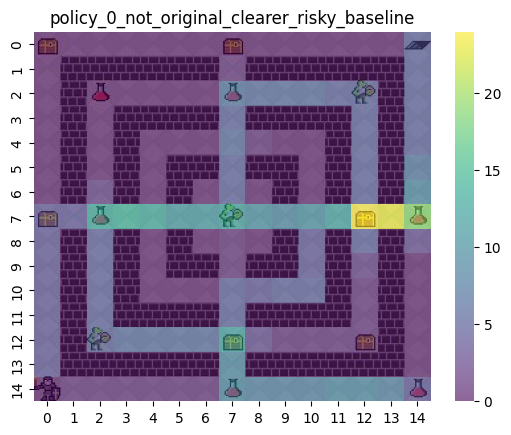

In [85]:
lvl = "policy_0"
config = config_0

print(lvl,config)
# img =gen_heatmap(df=df.loc[df['experiment'] == 'hard_original_optimal_test'], f ='./README/resources/md_stages_screenshots/md-hard-v0_step0.jpg')
try:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.jpg')
except:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.png')


{'lvl': 'check_1', 'reward_scheme': 'not_original', 'play_style': 'clearer_safe', 'exp_type': 'baseline'}
baseline
policy_0_not_original_clearer_safe_baseline


/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


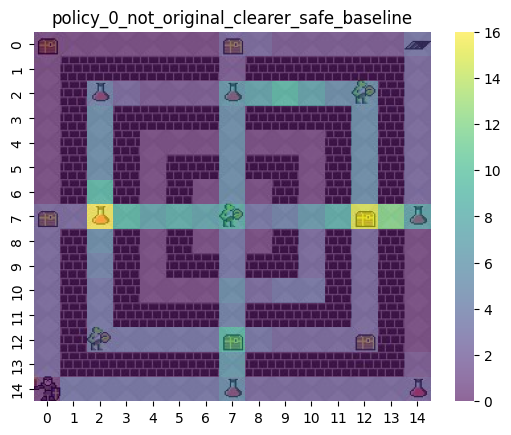

In [86]:

config = config_1
print(config)
# img =gen_heatmap(df=df.loc[df['experiment'] == 'hard_original_optimal_test'], f ='./README/resources/md_stages_screenshots/md-hard-v0_step0.jpg')
try:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.jpg')
except:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.png')


{'lvl': 'check_1', 'reward_scheme': 'not_original', 'play_style': 'killer_risky', 'exp_type': 'baseline'}
baseline
policy_0_not_original_killer_risky_baseline


/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


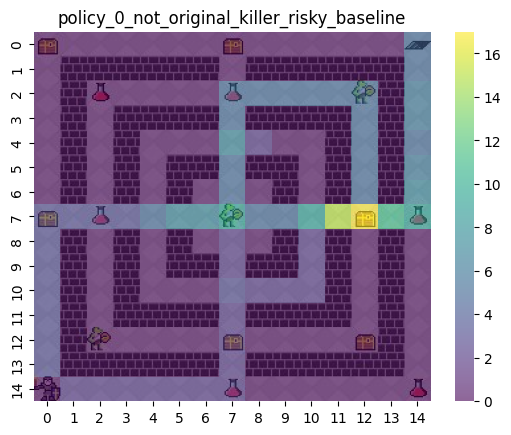

In [87]:

config = config_2
print(config)
# img =gen_heatmap(df=df.loc[df['experiment'] == 'hard_original_optimal_test'], f ='./README/resources/md_stages_screenshots/md-hard-v0_step0.jpg')
try:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.jpg')
except:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.png')


{'lvl': 'check_1', 'reward_scheme': 'not_original', 'play_style': 'killer_safe', 'exp_type': 'baseline'}
baseline
policy_0_not_original_killer_safe_baseline


/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


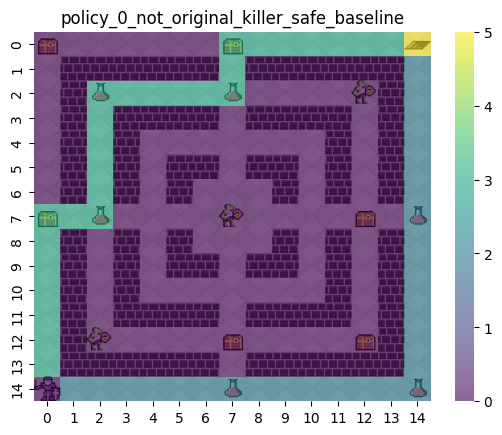

In [88]:

config = config_3
print(config)
# img =gen_heatmap(df=df.loc[df['experiment'] == 'hard_original_optimal_test'], f ='./README/resources/md_stages_screenshots/md-hard-v0_step0.jpg')
try:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.jpg')
except:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.png')


{'lvl': 'check_1', 'reward_scheme': 'not_original', 'play_style': 'runner_risky', 'exp_type': 'baseline'}
baseline
policy_0_not_original_runner_risky_baseline


/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


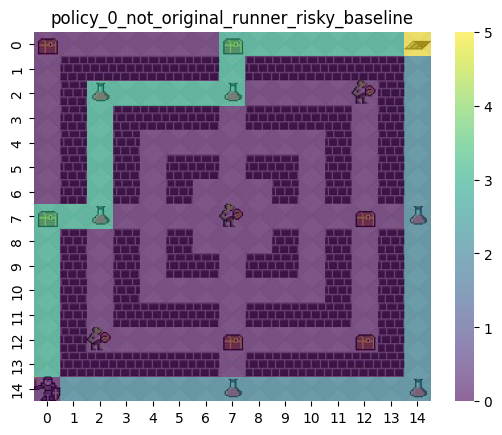

In [89]:

config = config_4
print(config)
# img =gen_heatmap(df=df.loc[df['experiment'] == 'hard_original_optimal_test'], f ='./README/resources/md_stages_screenshots/md-hard-v0_step0.jpg')
try:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.jpg')
except:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.png')


{'lvl': 'check_1', 'reward_scheme': 'not_original', 'play_style': 'runner_safe', 'exp_type': 'baseline'}
baseline
policy_0_not_original_runner_safe_baseline


/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


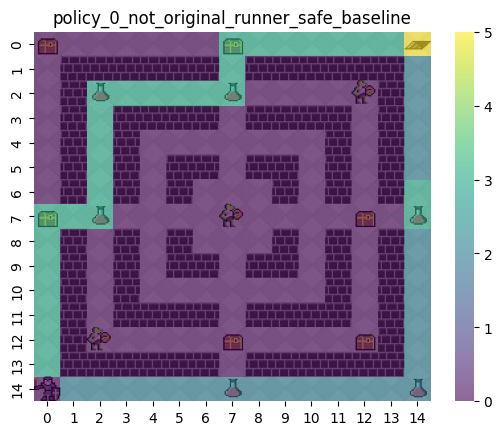

In [90]:

config = config_5
print(config)
# img =gen_heatmap(df=df.loc[df['experiment'] == 'hard_original_optimal_test'], f ='./README/resources/md_stages_screenshots/md-hard-v0_step0.jpg')
try:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.jpg')
except:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.png')


{'lvl': 'check_1', 'reward_scheme': 'not_original', 'play_style': 'treasure_risky', 'exp_type': 'baseline'}
baseline
policy_0_not_original_treasure_risky_baseline


/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


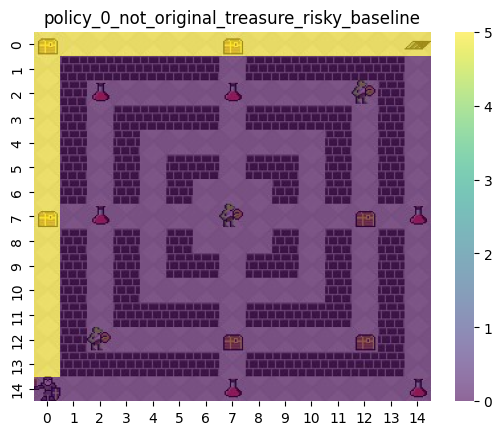

In [91]:

config = config_6
print(config)
# img =gen_heatmap(df=df.loc[df['experiment'] == 'hard_original_optimal_test'], f ='./README/resources/md_stages_screenshots/md-hard-v0_step0.jpg')
try:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.jpg')
except:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.png')


{'lvl': 'check_1', 'reward_scheme': 'not_original', 'play_style': 'treasure_safe', 'exp_type': 'baseline'}
baseline
policy_0_not_original_treasure_safe_baseline


/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


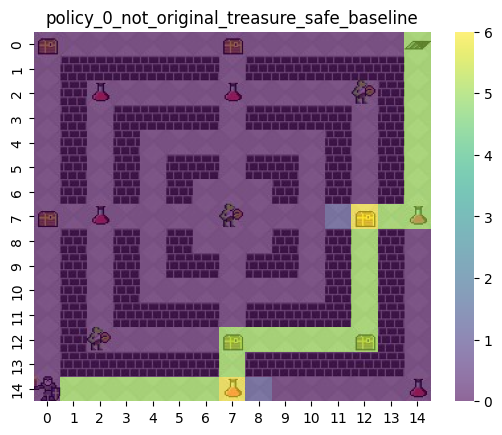

In [92]:

config = config_7
print(config)
# img =gen_heatmap(df=df.loc[df['experiment'] == 'hard_original_optimal_test'], f ='./README/resources/md_stages_screenshots/md-hard-v0_step0.jpg')
try:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.jpg')
except:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.png')


{'lvl': 'check_1', 'reward_scheme': 'original', 'play_style': 'optimal', 'exp_type': 'baseline'}
baseline
policy_0_original_optimal_baseline


/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/alex/anaconda3/envs/test1/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


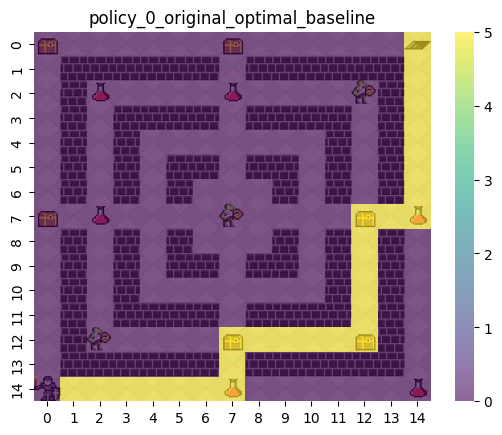

In [93]:
from IPython.display import display
config = config_8
print(config)
# img =gen_heatmap(df=df.loc[df['experiment'] == 'hard_original_optimal_test'], f ='./README/resources/md_stages_screenshots/md-hard-v0_step0.jpg')
try:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.jpg')
except:
    gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.png')


hard {'lvl': 'check_1', 'reward_scheme': 'original', 'play_style': 'optimal', 'exp_type': 'baseline'}
test_3
hard_original_optimal_test_3


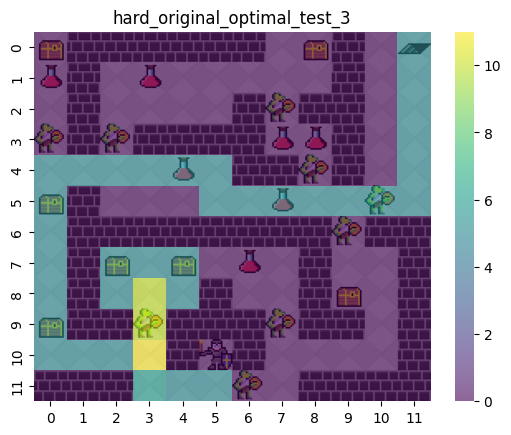

In [126]:
# lvl = "hard"
# config = config_8

# print(lvl,config)
# # img =gen_heatmap(df=df.loc[df['experiment'] == 'hard_original_optimal_test'], f ='./README/resources/md_stages_screenshots/md-hard-v0_step0.jpg')
# try:
#     gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type="test_3",path="batch",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.jpg')
# except:
#     gen_data_and_img(lvl=lvl,reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type="test_3",path="batch",img_path=f'./README/resources/md_stages_screenshots/md-{lvl}-v0_step0.png')


In [84]:
%%capture capt
from matplotlib import animation
from PIL import Image
import imageio
from PIL import ImageSequence
from IPython.display import clear_output

# # import gifmaker
# # import numpy as np

# def save_frames_as_gif(frames, path='./gifs/', filename='gym_animation.gif'):

#     #Mess with this to change frame size
#     # plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

#     patch = plt.imshow(frames[0])
#     plt.axis('off')

#     def animate(i):
#         patch.set_data(frames[i])

#     anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
#     anim.save(path + filename, writer='imagemagick', fps=60)

def gen_gif(lvl,reward_scheme, play_style,exp_type,path):   
    data =[]
    exp_type =exp_type
    lvl =lvl
    play_style= play_style
    reward_scheme=reward_scheme
    env = gym.make(f"md-{lvl}-v0")                                                           
                                                                
    # model = PPO(policy = "MlpPolicy",env =  env, verbose=1,device="cuda") 
    print(exp_type)
    exp = f"{lvl}_{reward_scheme}_{play_style}_{exp_type}"
    exp= exp
    print(exp)
    
    model = PPO.load(f"logs/{path}/{exp}/best_model/best_model")  # loading the model from ppo_cartpole.zip 

    frames = []
    obs = env.reset()
    frames.append(env.render(mode="human"))
    # print(img)                                                                  
    for i in range(1000): 
        print(1)
        # images.append(env.render(mode='rgb_array'))                                                                  
        action, _state = model.predict(obs, deterministic=False)                             
        obs, _, done, _ = env.step(action) 
        # grid= np.array(env.grid.g)  
        # data.append([exp, lvl, i, env.agent.x, env.agent.y, grid, play_style, info['action_taken'], obs, done, reward, dict(info),grid.shape[0],grid.shape[1]])
        frames.append(env.render(mode='human'))  
        clear_output(wait=False)

        if done:
            break                                                                  
 
    env.close()


    #Convert to GIF
    frames[0].save(f'./gifs/{exp}.gif', save_all=True, append_images=frames[1:], transparency=0, disposal=2)
    # from IPython.display import clear_output

config = config_3
print(config)

for i in range(len(models)):
    config = get_exp_details(models[i])
    gen_gif(lvl="hard",reward_scheme=config['reward_scheme'],play_style=config["play_style"],exp_type=config["exp_type"],path="Baseline")




FileNotFoundError: [Errno 2] No such file or directory: 'logs/Baseline/hard_not_original_clearer/best_model/best_model.zip'

In [ ]:
import wandb

wandb.init(project="gym-md_baselines", job_type="add heat")

wandb.init(project="gym-md_baselines", job_type="add heat")
artifact = wandb.Artifact(name="heatmaps_1", type="heatmap")
artifact.add_dir(local_path='')